# Data Science - Proyecto final - Coderhouse

Fernando Martínez Chehda

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv("credit_customers.csv")
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


Audiencia objetivo: Empresas financieras, organizaciones no gubernamentales, entidades o individuos que entregan/reciben créditos, personas interesadas en la ciencia de datos / análisis / riesgo crediticio / modelos de machine learning.

# Abstract

Este proyecto tiene como objetivo determinar el riesgo asociado a la concesión de créditos a clientes mediante técnicas de machine learning. Se utiliza un dataset que contiene información relevante sobre los clientes, como duración del crédito solicitado, ahorros aproximados al momento de la solicitud, propósito del crédito y edad, entre otros. Estas características se consideran fundamentales para evaluar el riesgo de devolución de un préstamo.

Para saber que variables sería apropiado analizar, se exploró la relevancia del "Scoring Crediticio", un método ampliamente utilizado por las empresas financieras para evaluar el riesgo de conceder créditos a sus clientes. El Scoring Crediticio es un modelo matemático que emplea variables financieras y características del cliente para asignar una puntuación que refleja la probabilidad de que dicho cliente cumpla con sus obligaciones crediticias. En base a esta información pública, se intentó tomar condiciones similares para que el proyecto cuente con una dosis de realidad. Además, se crearon gráficos utilizando las bibliotecas de visualización matplotlib y seaborn que permitieron visualizar de una manera más sencilla la relación que existía entre las variables seleccionadas.

Se evaluó la efectividad de diferentes modelos de machine learning, como regresión logística, árboles de decisión, random forest y redes neuronales, entre otros, para predecir el riesgo de crédito. Cada modelo se somete a una evaluación utilizando métricas de rendimiento, como precisión, recall y F1-score, con el objetivo de determinar cuál ofrece el mejor desempeño en la clasificación de clientes en las categorías de riesgo "bajo" y "alto".

Los resultados preliminares muestran que el modelo de Regresión Logística y el Random Forest presentan una precisión y recall razonables en la clasificación de los clientes. No obstante, se continúa optimizando los hiperparámetros y explorando otras técnicas de ajuste para mejorar la efectividad general del modelo.

En conclusión, este proyecto busca crear un modelo predictivo de riesgo de crédito y entender cómo las empresas utilizan el scoring crediticio en la práctica para tomar decisiones financieras informadas. El aprendizaje obtenido en este proyecto puede contribuir a seguir perfeccionando estos modelos y asegurar que sean justos y precisos al evaluar el riesgo crediticio de los clientes.

# Hipótesis

#### Hipótesis 1: A medida que la edad de los solicitantes de crédito disminuye, el riesgo asociado a la entrega del crédito tiende a aumentar.

#### Hipótesis 2: La estabilidad laboral de una persona influye significativamente en el nivel de riesgo crediticio. Se espera que aquellos con un empleo estable tengan un menor riesgo al ser evaluados para la concesión de un crédito

#### Hipótesis 3: La cantidad de ahorros de una persona se relaciona directamente con el riesgo de no devolver un crédito. Se anticipa que aquellos individuos con un mayor nivel de ahorros presenten un menor riesgo crediticio.

Análisis descriptivo de datos:

Se crea nueva columna para sacar un ratio entre el monto y la duracion

In [3]:
data['credit_duration_ratio'] = data['credit_amount'] / data['duration']

<AxesSubplot:xlabel='age', ylabel='class'>

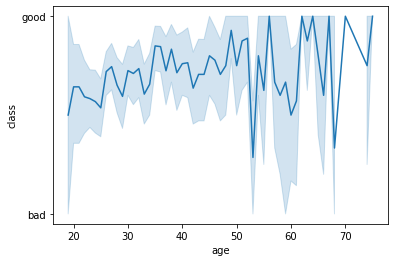

In [4]:
sns.lineplot(data=data, x='age', y='class')

<AxesSubplot:xlabel='class', ylabel='age'>

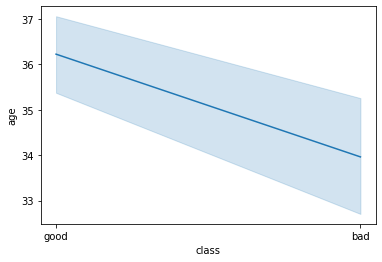

In [5]:
sns.lineplot(data=data, x='class', y='age')

Se puede apreciar una clara tendencia que indica que a medida que la edad aumenta, el riesgo asociado a la entrega de un crédito disminuye.

A continuación, se procederá a realizar un análisis más detallado de la columna de edad para examinar los datos disponibles.

In [6]:
data['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

Podemos ver en base al desvío estándar y los cuartiles que este dataset trabaja con un amplio rango etario, lo cual es bueno. Me gustaría ver la relación de las edades con los ahorros o con la cantidad de crédito que se pidió, ¿serán las personas jóvenes más riesgosas o conservadoras al momento de pedir un préstamo?

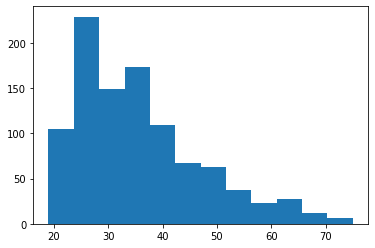

In [7]:
plt.hist(data['age'], bins=12)
plt.show()

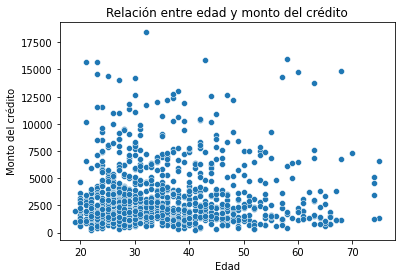

In [8]:
sns.scatterplot(data=data, x='age', y='credit_amount')
plt.xlabel('Edad')
plt.ylabel('Monto del crédito')
plt.title('Relación entre edad y monto del crédito')
plt.show()

In [9]:
data['age'] = data['age'].astype(int)
data['age']

0      67
1      22
2      49
3      45
4      53
       ..
995    31
996    40
997    38
998    23
999    27
Name: age, Length: 1000, dtype: int32

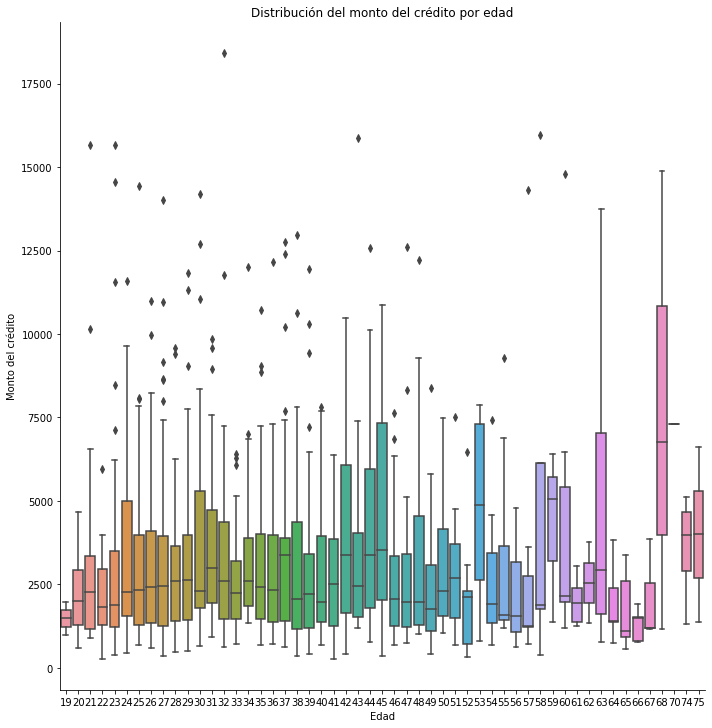

In [10]:
data['age'].astype(int)
sns.catplot(data=data, x='age', y='credit_amount', kind='box', height= 10)
plt.xlabel('Edad')
plt.ylabel('Monto del crédito')
plt.title('Distribución del monto del crédito por edad')
plt.show()

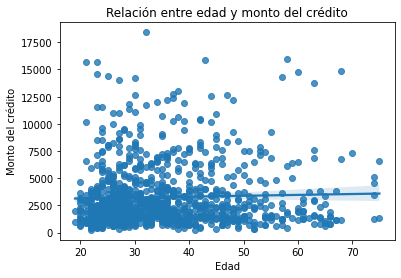

In [11]:
sns.regplot(data=data, x='age', y='credit_amount')
plt.xlabel('Edad')
plt.ylabel('Monto del crédito')
plt.title('Relación entre edad y monto del crédito')
plt.show()

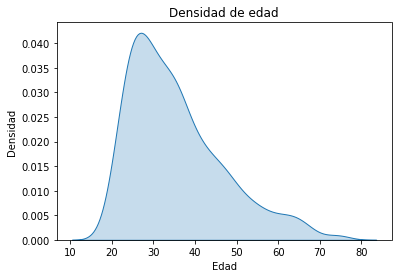

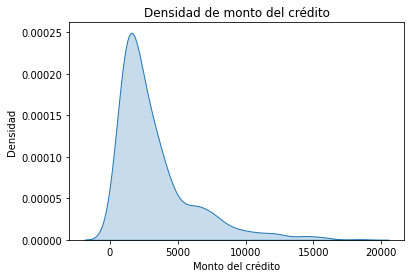

In [12]:
sns.kdeplot(data=data, x='age', fill=True)
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Densidad de edad')
plt.show()

sns.kdeplot(data=data, x='credit_amount', fill=True)
plt.xlabel('Monto del crédito')
plt.ylabel('Densidad')
plt.title('Densidad de monto del crédito')
plt.show()

Observamos en base a los gráficos que por lo menos en este dataset la edad y el monto del crédito solicitado no tienen una relación significante 

<AxesSubplot:xlabel='class', ylabel='employment'>

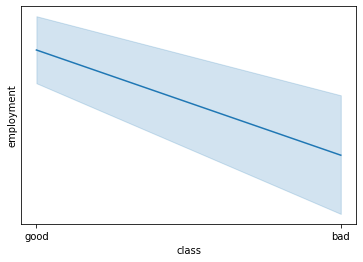

In [13]:
sns.lineplot(data=data, x='class', y='employment')

In [14]:
cambios_employment = {
    'unemployed': 0,
    '<1': 0.5,
    '4<=X<7': 5.5,
    '>=7': 7,
    '1<=X<4': 2.2
}

data['employment'] = data['employment'].replace(cambios_employment)
data['employment']

0      7.0
1      2.2
2      5.5
3      5.5
4      2.2
      ... 
995    5.5
996    2.2
997    7.0
998    2.2
999    0.0
Name: employment, Length: 1000, dtype: float64

<AxesSubplot:xlabel='employment', ylabel='class'>

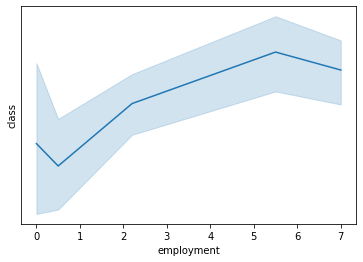

In [15]:
sns.lineplot(data=data, x='employment', y='class')

<AxesSubplot:xlabel='employment', ylabel='count'>

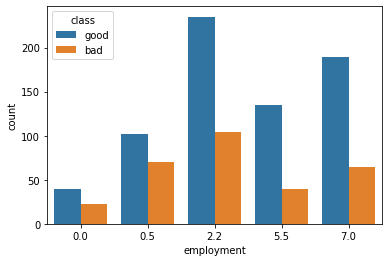

In [16]:
sns.countplot(x='employment', hue='class', data=data)

In [17]:
promedio_credit_amount = data.groupby(['employment', 'class'])['credit_amount'].mean().unstack()
diferencia_promedio = promedio_credit_amount['good'] - promedio_credit_amount['bad']
diferencia_promedio

employment
0.0     -64.527313
0.5    -660.760784
2.2   -1158.096154
5.5    -548.500855
7.0   -1620.091683
dtype: float64

Si bien estamos trabajando en base a promedios, podemos ver que se cumple la hipótesis, a mayor tiempo trabajado, menor riesgo de entregar un crédito. Ahora trabajaremos con la tercer hipótesis:

In [18]:
data['savings_status'].unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500'],
      dtype=object)

In [19]:
data['savings_status'] = data['savings_status'].replace({
    'no known savings': 0,
    '<100': 50,
    '500<=X<1000': 750,
    '>=1000': 1000,
    '100<=X<500': 350
})
data['savings_status']

0        0
1       50
2       50
3       50
4       50
      ... 
995     50
996     50
997     50
998     50
999    350
Name: savings_status, Length: 1000, dtype: int64

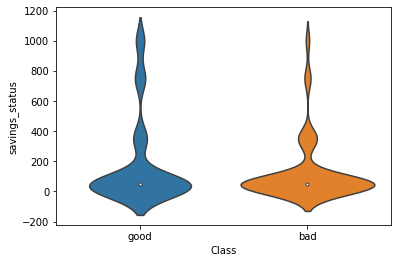

In [20]:
sns.violinplot(data=data, x='class', y='savings_status')
plt.xlabel('Class')
plt.show()

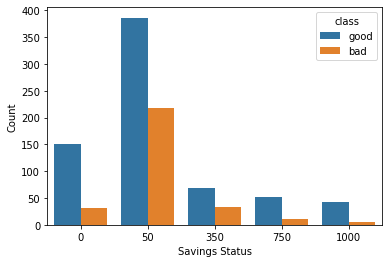

In [21]:
sns.countplot(data=data, x='savings_status', hue='class')
plt.xlabel('Savings Status')
plt.ylabel('Count')
plt.show()

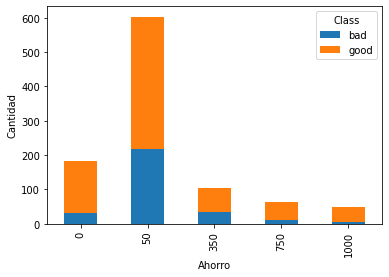

In [22]:
cross_table = pd.crosstab(data['savings_status'], data['class'])
cross_table.plot(kind='bar', stacked=True)
plt.xlabel('Ahorro')
plt.ylabel('Cantidad')
plt.legend(title='Class')
plt.show()

No se observa una notoria diferencia entre las cantidades de ahorro y en la clase en la que divide este dataset entre buen riesgo y mal riesgo.

Se procederá a crar un heatmap para verificar las correlaciones de las variables numéricas que tenemos en el dataset, de esta forma contribuye al análisis bivariado del problema. Antes de hacer esto, vamos a transformar los datos de la columna class para transformarla en datos numéricos y así pueda entrar en nuestro heatmap.

In [23]:
data['class'] = data['class'].map({'bad': 0, 'good': 1})

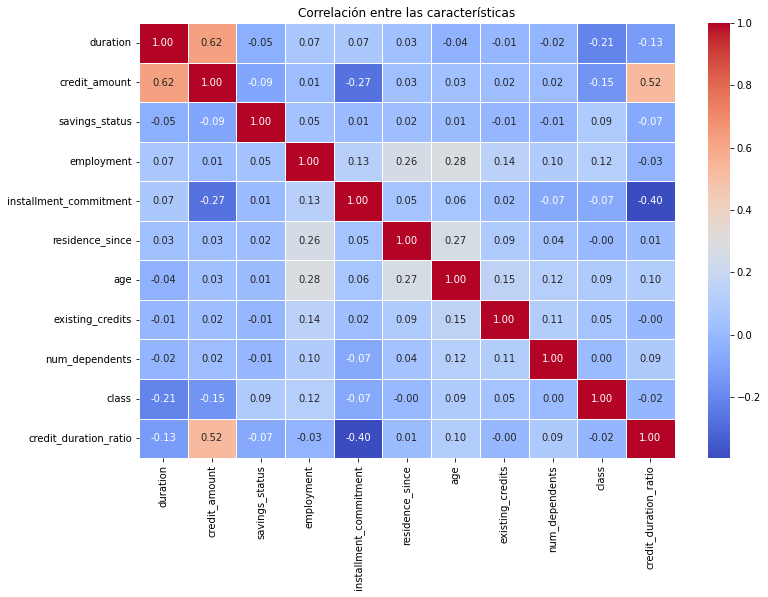

In [24]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre las características')
plt.show()

Vemos que la relación entre credit_amount y duration indicaría que a mayor tiempo a que se pide el crédito, mayor es el monto del mismo.

Este gráfico también nos permite ver que no existe una correlación realmente significativa entre ninguna de las variables, lo que es bueno para los modelos de machine learning con los que trabajaremos a continuación ya que hace que puedan mostrar resultados menos sesgados.

A continuación de procederá a transformar las variables a valores numéricos para poder trabajar en su selección y entrenamiento

In [25]:
columnas = data.select_dtypes(include=['object']).columns.tolist()

encoded_columns = pd.get_dummies(data, columns=columnas)

label_encoder = LabelEncoder()
for col in columnas:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

In [26]:
encoded_columns

,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,class,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.0,1169.0,0,7.0,4.0,4.0,67,2.0,1.0,1,...,1,0,0,1,0,0,0,1,0,1
1,48.0,5951.0,50,2.2,2.0,2.0,22,1.0,1.0,0,...,1,0,0,1,0,0,1,0,0,1
2,12.0,2096.0,50,5.5,2.0,3.0,49,1.0,2.0,1,...,1,0,0,0,0,1,1,0,0,1
3,42.0,7882.0,50,5.5,2.0,4.0,45,1.0,2.0,1,...,0,0,0,1,0,0,1,0,0,1
4,24.0,4870.0,50,2.2,3.0,4.0,53,2.0,2.0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,50,5.5,3.0,4.0,31,1.0,1.0,1,...,1,0,0,0,0,1,1,0,0,1
996,30.0,3857.0,50,2.2,4.0,4.0,40,1.0,1.0,1,...,1,0,1,0,0,0,0,1,0,1
997,12.0,804.0,50,7.0,4.0,4.0,38,1.0,1.0,1,...,1,0,0,1,0,0,1,0,0,1
998,45.0,1845.0,50,2.2,4.0,4.0,23,1.0,1.0,0,...,0,0,0,1,0,0,0,1,0,1


# Análisis de componentes principales

Utilizaremos PCA (Principal Componente Analysis) para reducir la dimensionalidad de las variables en nuestro conjunto de datos. El objetivo es encontrar los componentes principales de nuestro dataset para no solo reducir la cantidad de características, sino quedarnos con las más importantes que van a ser útiles para el entrenamiento de nuestros datos y posterior predicción mediante modelos de machine learning.

Para poder emplear esta técnica, primero se realizará una preparación de los datos, luego seleccionaremos el número de componentes principales deseados, en nuestro caso serán los que expliquen el 95% de la varianza. Finalmente, crearemos un nuevo dataset con los datos transformados por PCA.

In [27]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_columns)

features = encoded_columns.drop('class', axis=1)
target = encoded_columns['class'] 

pca = PCA(n_components=0.95) 
pca.fit(scaled_features)

features_pca = pca.transform(scaled_features)

pca_df_class = pd.concat([pd.DataFrame(features_pca), target.reset_index(drop=True)], axis=1)

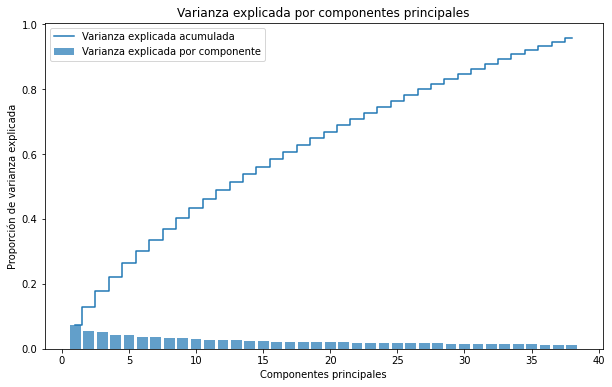

In [28]:
varianza = pca.explained_variance_ratio_

varianza_acumulada = np.cumsum(varianza)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza) + 1), varianza, alpha=0.7, align='center', label='Varianza explicada por componente')
plt.step(range(1, len(varianza) + 1), varianza_acumulada, where='mid', label='Varianza explicada acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend()
plt.show()

El gráfico nos resulta muy útil para entender que cerca del componente 38 se alcanza el 95% (o muy cerca de él), lo cual sugiere que con 38 componentes principales se estarían conservando la totalidad de los datos originales.

In [29]:
pca_df_class

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,class
0,0.524002,3.093593,0.780818,-1.310042,-0.573078,1.150885,-0.032575,1.150012,0.292266,-1.725898,...,1.100868,-0.237184,0.596948,0.777364,-0.311038,0.156469,0.201468,-0.585397,-0.139705,1
1,-1.544386,-1.870396,-1.783352,0.975808,0.071925,0.656404,-0.130111,-0.473354,-2.254737,0.641032,...,-0.658884,-0.282332,1.486592,0.042644,1.104596,0.210306,0.461641,0.565102,-0.067326,0
2,-0.505640,2.676345,2.203610,-1.033936,-0.586360,-1.293513,-1.704021,0.064256,-0.695626,-0.817053,...,0.088793,0.649744,0.518685,-0.267440,-0.720611,-0.044963,0.993296,0.590539,-0.817860,1
3,1.025359,-2.246759,2.723135,-0.716432,-0.523348,3.822913,1.692041,-1.364408,-0.079252,-2.040387,...,0.145503,0.622453,-1.761593,-2.149743,0.202900,0.714158,-0.277560,1.881072,-0.210656,1
4,3.013324,-0.813731,2.537562,-1.878680,-2.316266,-0.457122,0.525092,-2.308520,-1.963672,-0.371855,...,-0.327713,0.011513,-1.252969,0.464859,0.042746,0.293577,0.505182,0.482757,0.934555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.423481,-0.086895,0.038864,-0.927595,0.062746,-1.001681,-1.647138,0.795795,0.496493,-0.837673,...,0.552102,-0.709762,0.087741,-0.958456,-0.473365,-0.289977,0.673689,0.575420,0.012872,1
996,1.665738,-0.935965,-1.195475,-0.167552,2.047757,-0.012701,-1.285963,-0.299566,1.531355,-2.604651,...,0.582561,1.521364,0.678483,1.531608,0.667889,-0.492889,1.183363,-0.726180,-0.268358,1
997,-1.165210,1.796394,-1.318719,-0.902796,-1.140842,1.876431,-0.848947,-1.131281,0.635929,0.714915,...,1.057683,0.236112,-0.046778,-0.244076,-0.208724,-0.495746,0.140057,0.053531,0.171112,1
998,2.458710,-2.156999,-0.407025,-1.814566,-2.016388,2.460938,-0.736090,-1.291250,-0.134545,-0.025201,...,-0.291269,-0.263864,-0.681539,-0.526300,1.271832,-0.280165,-0.164051,-1.436758,0.920652,0


# Evaluando modelos de Machine Learning 

En este trabajo se decidió probar 4 modelos de machine learning para ver su eficacia. Para realizarlo, primero se realizaran ajustes de hiperparámetros de acuerdo al modelo que se quiera utilizar. Esto implica encontrar una combinación óptima de valores que puede mejorar el rendimiento del modelo.

Estaremos utilizando el dataset "pca_df_class" generado por el análisis de componentes principales, e iremos modificando el ajuste de hiperparámetros de acuerdo al modelo que vayamos a probar

In [30]:
# Separamos los datos y los dividimos en conjuntos de entrenamiento y prueba
X = pca_df_class.drop('class', axis=1)
y = pca_df_class['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión logística

In [31]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear']  
}

# Usamos GridSearchCV
logistic = LogisticRegression()
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

accuracy = grid_search.score(X_test, y_test)
print("Precisión del modelo en datos de prueba:", accuracy)

Mejores parámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Precisión del modelo en datos de prueba: 0.995


Se logró una precisión muy alta del 99,5%, lo cual nos dice que este modelo es capaz de predecir la variable objetivo casi con total seguridad. Probaremos otros modelos para ver como se comportan.

# Random forest

In [32]:
rf_model = RandomForestClassifier()

# Hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
accuracy = best_rf_model.score(X_test, y_test)
print("Precisión del modelo en datos de prueba:", accuracy)

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precisión del modelo en datos de prueba: 0.9


# Naive Bayes

In [33]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

precision = naive_bayes.score(X_test, y_test)
print("Precisión del modelo en datos de prueba:", precision)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión del modelo en datos de prueba: 0.895

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        59
           1       0.91      0.94      0.93       141

    accuracy                           0.90       200
   macro avg       0.88      0.86      0.87       200
weighted avg       0.89      0.90      0.89       200

Matriz de confusión:
[[ 46  13]
 [  8 133]]


# Redes neuronales

In [35]:
mlp = MLPClassifier()

# Hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

print("Precisión del modelo en datos de prueba:", grid_search.best_score_)

Mejores parámetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Precisión del modelo en datos de prueba: 0.99375


# Cross validation

Hemos probado 4 modelos de machine learning y ahora utilizaremos la validación cruzada para ver cual de ellos es el que mejor se adapta a nuestro dataset y nos brinda la mejor predicción a la clase objetivo. Para realizarlo, utilizaremos los parámetros óptimos que nos resultó al usar GridSearchCV.

In [39]:
# Se eligen los mejores parámetros para cada modelo
log_reg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
rand_forest = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
naive_bayes = GaussianNB()
neural_network = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='adaptive', solver='adam')

# Los evaluamos
models = [log_reg, rand_forest, naive_bayes, neural_network]
model_names = ['Regresión Logística', 'Random Forest', 'Naive Bayes', 'Redes Neuronales']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, pca_df_class.drop('class', axis=1), pca_df_class['class'], cv=5, scoring='accuracy')
    print(f"{name}: Promedio de precisión - {scores.mean():.4f}, Desviación estándar - {scores.std():.4f}")

Regresión Logística: Promedio de precisión - 0.9910, Desviación estándar - 0.0037
Random Forest: Promedio de precisión - 0.9040, Desviación estándar - 0.0132
Naive Bayes: Promedio de precisión - 0.8850, Desviación estándar - 0.0187
Redes Neuronales: Promedio de precisión - 0.9890, Desviación estándar - 0.0037


Podemos observar que los modelos que brindaron mejores resultados fueron los de regresión logística y redes neuronales, en base a la precisión promedio obtenida en la validación cruzada.
Regresión logística brinda la ventaja de que es más simple computacionalmente y acepta fácilmente grandes cantidades de datos. También es más sencilla de interpretar y se comporta muy bien cuando la variable objetivo tiene dos opciones posibles, como lo es nuestro caso.
Redes neuronales brinda la ventaja de que es muy bueno para rastrear relaciones más complejas entre variables, lo cual es útil para datasets con información no lineal.
Para este caso, el modelo elegido será el de "Regresión Logística", no solo brinda una precisión promedio muy grande, sino que su eficiencia computacional nos facilita el juntar muchos datos y compararlos con la variable objetivo de naturaleza bivariada de manera eficaz.

# Modelo final

In [41]:
best_params = {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

# Modelo de regresión logística con los mejores parámetros
final_model = LogisticRegression(**best_params)

final_model.fit(X_train, y_train)

predicciones = final_model.predict(X_test)

accuracy = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo en datos de prueba: {accuracy:.3f}")

print(classification_report(y_test, predicciones))
print("Matriz de confusión:")
print(confusion_matrix(y_test, predicciones))

Precisión del modelo en datos de prueba: 0.995
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.99      1.00       141

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Matriz de confusión:
[[ 59   0]
 [  1 140]]


- La precisión general del modelo es del 99.5%
- Presición 0 (clase bad) = 98%
- Presición 1 (clase good) = 100%
- El recall muestra buenos resultados para ambas clases, 98% y 100% para 0 y 1 respectivamente.
- La matriz de confusión muestra que el modelo cometió un solo error al clasificar la clase 0 y ninguno al clasificar la clase 1. Esto indica una clasificación precisa y mínimos falsos positivos/negativos.

# Conclusiones

En la etapa de evaluación de nuestras hipótesis iniciales, se ha observado que existen correlaciones estadísticamente significativas entre ciertos factores y el riesgo crediticio. En primer lugar, se ha constatado una correlación inversa entre la edad del solicitante y el riesgo crediticio; a medida que la edad disminuye, el riesgo de otorgar un crédito tiende a aumentar. Este hallazgo valida nuestra primera hipótesis. Adicionalmente, se ha identificado una relación inversa entre la duración del empleo del solicitante y el riesgo crediticio, respaldando nuestra segunda hipótesis. Sin embargo, no se ha encontrado evidencia que respalde nuestra tercera hipótesis, que postulaba una relación significativa entre la cantidad de ahorro y el riesgo crediticio.

En la fase de evaluación de modelos de machine learning, el modelo de regresión logística se ha destacado como el más eficaz en la tarea de predicción de riesgo crediticio. Este resultado era previsible, dado que nuestro objetivo es de naturaleza binaria, y la regresión logística es un enfoque apropiado para este tipo de predicción. No obstante, es fundamental destacar que estas conclusiones se derivan de la transformación y el análisis de los datos en nuestro conjunto de datos específico. En futuras investigaciones, podríamos explorar otras transformaciones de datos o realizar análisis más detallados con el fin de obtener conclusiones aún más precisas y significativas. 